## Multiclass Classification

#### Wine Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.data.shape

(178, 13)

In [5]:
# X 는 표준화
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)

In [6]:
# y 는 원핫인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(wine.target)
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    wine_std, Y, stratify=Y, test_size=0.2, random_state=seed
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(30, input_dim=13, activation='relu'),
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
hist = model.fit(X_train, Y_train, validation_split=0.2,
                 epochs=100, batch_size=100)

Epoch 1/100
2/2 [==============================] - 1s 148ms/step - loss: 1.9052 - accuracy: 0.3097 - val_loss: 1.6885 - val_accuracy: 0.2414
Epoch 2/100
2/2 [==============================] - 0s 20ms/step - loss: 1.7974 - accuracy: 0.3274 - val_loss: 1.5971 - val_accuracy: 0.2414
Epoch 3/100
2/2 [==============================] - 0s 22ms/step - loss: 1.6979 - accuracy: 0.3274 - val_loss: 1.5142 - val_accuracy: 0.2414
Epoch 4/100
2/2 [==============================] - 0s 20ms/step - loss: 1.6102 - accuracy: 0.3363 - val_loss: 1.4398 - val_accuracy: 0.2759
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 1.5276 - accuracy: 0.3363 - val_loss: 1.3735 - val_accuracy: 0.3103
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 1.4533 - accuracy: 0.3540 - val_loss: 1.3120 - val_accuracy: 0.3448
Epoch 7/100
2/2 [==============================] - 0s 20ms/step - loss: 1.3849 - accuracy: 0.3894 - val_loss: 1.2561 - val_accuracy: 0.3448
Epoch 8/100
2/2 [==

In [12]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.1301 - accuracy: 0.9722


[0.1300567388534546, 0.9722222089767456]

In [13]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

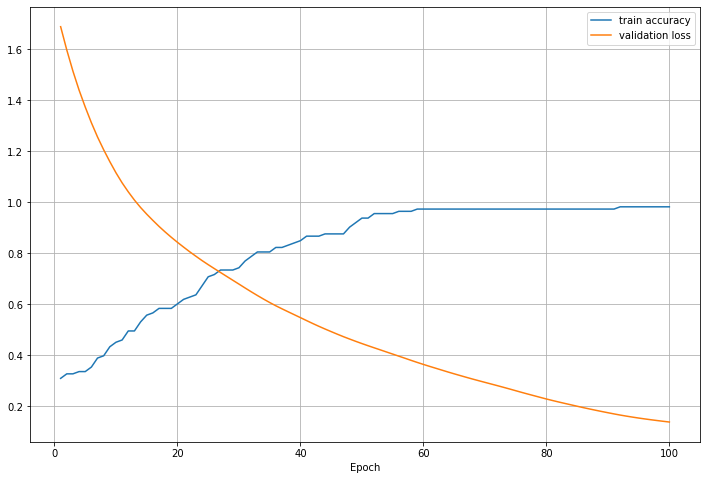

In [14]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.show()

In [24]:
model_2 = Sequential([ 
    Dense(30, input_dim=13, activation='relu'),
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')      # 노드수는 y의 종류(N)수, 활성화함수는 softmax
])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                420       
                                                                 
 dense_7 (Dense)             (None, 12)                372       
                                                                 
 dense_8 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_2.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history_2 = model_2.fit(X_train, Y_train, validation_split=0.2,
                    epochs=1000, batch_size=100, verbose=0)

In [27]:
model_2.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 3ms/step - loss: 8.4267e-04 - accuracy: 1.0000


[0.000842672074213624, 1.0]

In [28]:
y_acc_2 = history_2.history['accuracy']
y_vloss_2 = history_2.history['val_loss']
xs_2 = np.arange(1, len(y_acc_2)+1)

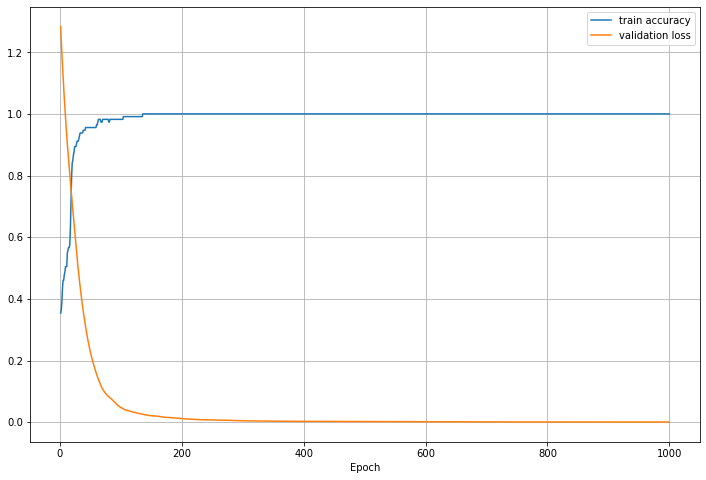

In [29]:
plt.figure(figsize=(12,8))
plt.plot(xs_2, y_acc_2, label='train accuracy')
plt.plot(xs_2, y_vloss_2, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.show()

- Model Save & Load

In [31]:
model_2.save('./models/wine.h5')

In [33]:
from tensorflow.keras.models import load_model
my_model = load_model('./models/wine.h5')
my_model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 3ms/step - loss: 8.4267e-04 - accuracy: 1.0000


[0.000842672074213624, 1.0]

- Test

In [35]:
wine_std[100], Y[100]

(array([-1.13720713, -0.23011443, -2.43634632, -0.59905169, -0.192495  ,
        -0.10433159,  0.14128858, -0.82071924, -0.33447089, -0.76049691,
         1.37126518,  0.49197446, -0.11748635]),
 array([0., 1., 0.], dtype=float32))

In [36]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [37]:
my_model.evaluate(wine_std[100].reshape(1, -1), Y[100].reshape(1, -1))

1/1 [==============================] - 0s 17ms/step - loss: 5.3644e-06 - accuracy: 1.0000


[5.364403477869928e-06, 1.0]